## Basic prediction without parameters

* data vector: version05

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [2]:
vec = pd.read_csv('learning_vectors/v05/version5-complete.csv', sep=',')
print(vec.shape)
vec.head()


(6080, 62)


,Match_id,League_id,Season,Stage,Date,H_team,A_team,Result,H_Speed,H_Pass,...,H_WeightedMeanShots05,A_WeightedMeanShots05,H_WeightedMeanShotsOnTarget03,A_WeightedMeanShotsOnTarget03,H_WeightedMeanShotsOnTarget05,A_WeightedMeanShotsOnTarget05,H_WeightedMeanFullTimeGoals03,A_WeightedMeanFullTimeGoals03,H_WeightedMeanFullTimeGoals05,A_WeightedMeanFullTimeGoals05
0,1730,1729,2008/2009,1,2008-08-16,Arsenal,West Bromwich Albion,0,66,30,...,19.617647,11.823529,15.578947,7.368421,11.558824,5.058824,2.842105,1.315789,2.000000,0.735294
1,1731,1729,2008/2009,1,2008-08-16,Sunderland,Liverpool,2,60,70,...,8.000000,17.882353,3.473684,11.473684,4.235294,9.529412,0.000000,1.421053,0.558824,1.764706
2,1732,1729,2008/2009,1,2008-08-16,West Ham United,Wigan Athletic,0,58,30,...,13.558824,17.264706,8.052632,9.052632,8.058824,9.176471,1.473684,1.368421,1.029412,1.117647
3,1734,1729,2008/2009,1,2008-08-16,Everton,Blackburn Rovers,2,60,65,...,13.088235,13.911765,7.631579,10.263158,6.941176,7.764706,1.947368,3.368421,1.882353,2.058824
4,1735,1729,2008/2009,1,2008-08-16,Middlesbrough,Tottenham Hotspur,0,70,70,...,13.058824,10.735294,9.631579,7.157895,7.558824,6.382353,2.421053,3.263158,1.941176,2.411765


Alg/res.mean/res.std
LR: 0.535691 (0.003585)
LDA: 0.532072 (0.001882)
KNN: 0.475987 (0.004978)
CART: 0.421217 (0.005452)
NB: 0.457237 (0.014689)
SVM: 0.469408 (0.012930)


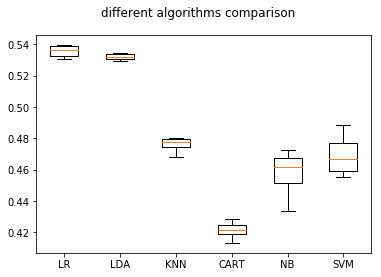

In [5]:
pred = [#'Match_id', 'League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result', 
        #'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth', 
        #'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth', 
        'H_age', 'A_age', 
        'H_TMV', 'A_TMV', 
        #'FTHG', 'FTAG', 
        #'HS', 'AS', 
        #'HST', 'AST', 
        'H_Form03', 'A_Form03', 
        'H_Form05', 'A_Form05', 
        'H_MeanShots03', 'A_MeanShots03', 
        'H_MeanShots05', 'A_MeanShots05', 
        'H_MeanShotsOnTarget03', 'A_MeanShotsOnTarget03', 
        'H_MeanShotsOnTarget05', 'A_MeanShotsOnTarget05', 
        'H_MeanFullTimeGoals03', 'A_MeanFullTimeGoals03', 
        'H_MeanFullTimeGoals05', 'A_MeanFullTimeGoals05', 
        'H_WeightedMeanShots03', 'A_WeightedMeanShots03', 
        'H_WeightedMeanShots05', 'A_WeightedMeanShots05', 
        'H_WeightedMeanShotsOnTarget03', 'A_WeightedMeanShotsOnTarget03', 
        'H_WeightedMeanShotsOnTarget05', 'A_WeightedMeanShotsOnTarget05', 
        'H_WeightedMeanFullTimeGoals03', 'A_WeightedMeanFullTimeGoals03', 
        'H_WeightedMeanFullTimeGoals05', 'A_WeightedMeanFullTimeGoals05'
]

X = vec[pred]
y = vec['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC()))

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
